# Demonstration de la politique de relaxation
## Quelques exemples

In [24]:
import numpy as np
from Problem import Problem
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Comparaison de la relaxation aux index de Whittle

### Exemple 12
### Un probleme où la relaxation est plus performante que Whittle

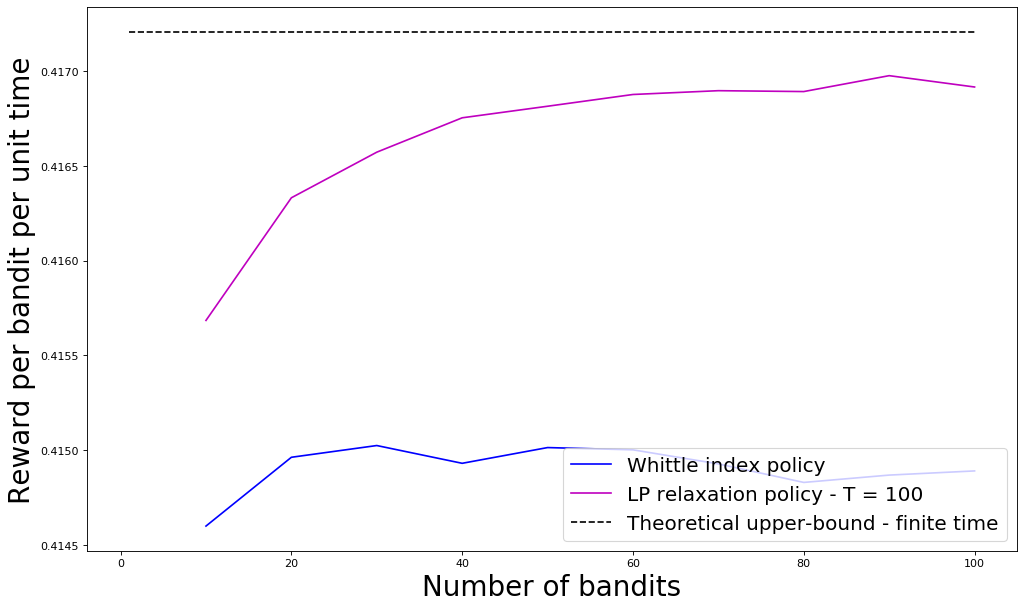

In [2]:
b = np.load("problems.npz",allow_pickle = True)['arr_0']
P0,P1,R1,aaa = b[12]
R0 = [0 for _ in range(3)]
p = Problem(3, 50, 0.6, 100, PR=[P0, P1, R0, R1], tau=100, time_exp=100, repeat_times = 100)
p.plot_sim_nbbandits(whittle=True)
    

### Impact du choix de $T_H$ sur la performance

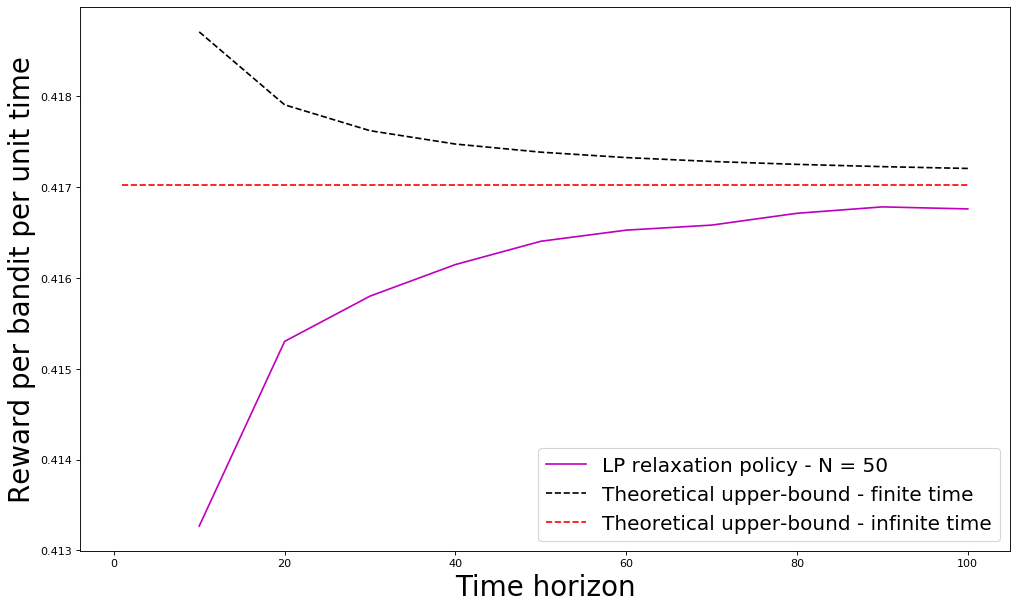

In [3]:
p.plot_sim_timehorizon()

### Impact du choix de $\tau$ sur les performances et evolution de la politique au cours du temps

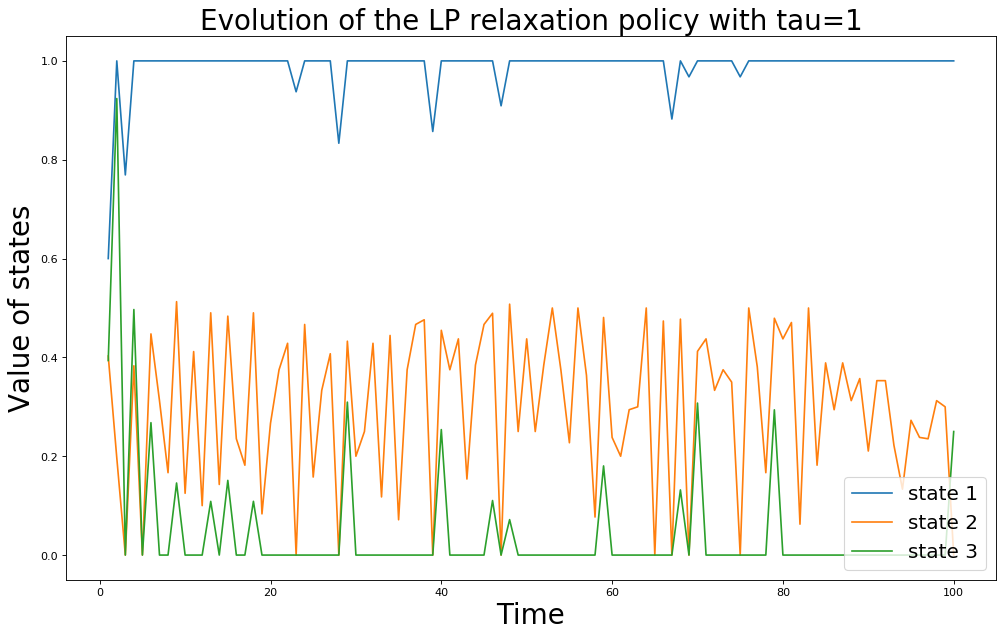

In [4]:
p.plot_policy_evolution()

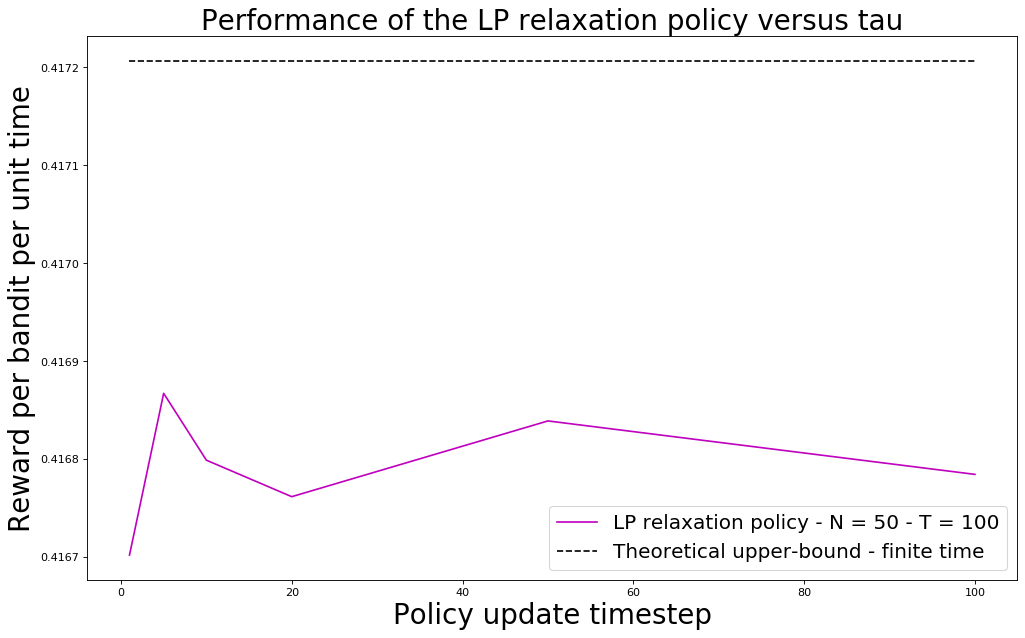

In [5]:
p.plot_sim_tau()

### Aggrégation des performances de plusieurs problèmes

In [4]:
import matplotlib.pyplot as plt
nb_state = 3
init_nb_bandit = 50
time_horizon = 100
tau = 100
time_exp = 100
repeat_times = 50
number_bandits_list = list(range(10, 120, 10))


KeyboardInterrupt: 

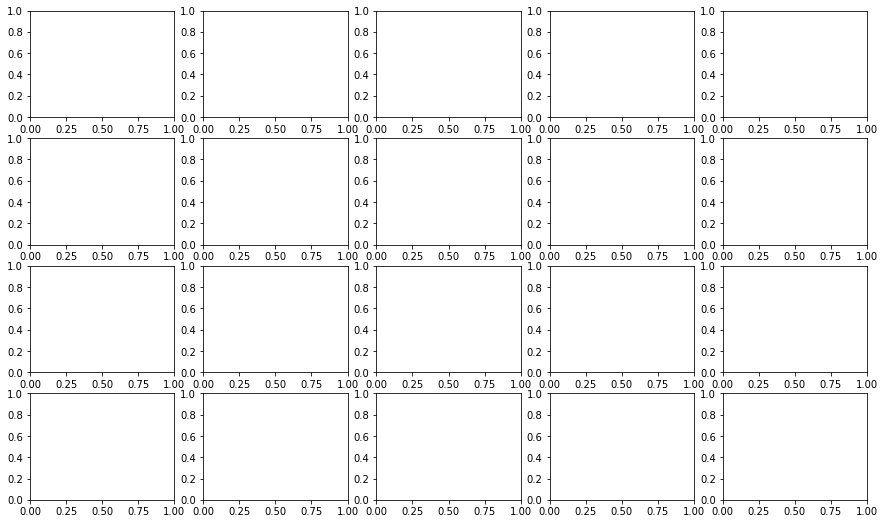

In [5]:
fig, axes = plt.subplots(nrows=4,ncols=5, figsize=(15, 9), facecolor='w', edgecolor='k')

pairs = [(0, 0.3),
(1, 0.4),
(2, 0.5),
(3, 0.7),
(4, 0.5),
(5, 0.5),
(6, 0.5),
(7, 0.6),
(8, 0.3),
(9, 0.4),
(10, 0.6),
(11, 0.6),
(12, 0.4),
(13, 0.3),
(14, 0.4),
(15, 0.6),
(16, 0.7),
(17, 0.6),
(18, 0.5),
(20, 0.2),
(21, 0.2)]
l = np.linspace(1, number_bandits_list[-1], 100)

a = np.load("problems.npz",allow_pickle = True)
b = a['arr_0']
cpt = 0

for i, row in enumerate(axes):
    for j, ax in  enumerate(row):
        pb, alpha = pairs[cpt]
        P0,P1,R1,_ = b[pb]
        R0 = [0 for _ in range(3)]
        p = Problem(nb_state, 50, alpha, time_horizon, PR=[P0, P1, R0, R1], tau=tau, time_exp=time_exp, repeat_times=repeat_times,
                   number_bandits_list=number_bandits_list)

        V_upper, V_whittle, w = p.whittle_simulation()
        total_values, r_ubound = p.simulation(mode=1)
        ax.plot(l,[r_ubound]*100,'k--',label = 'Theoretical upper-bound - finite time')
        ax.plot(number_bandits_list,w,'b',label = 'Simulation of Whittle index policy')

        ax.plot(number_bandits_list, total_values, 'm', label="LP relaxation policy")


        ax.set_yticks([], [])
        cpt += 1

# legends        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'lower center')


# Quelques tests 

In [11]:
b = a['arr_0']
cpt, alpha = pairs[0]
P0,P1,R1,aaa = b[cpt]
R0 = [0 for _ in range(3)]
p = Problem(3, 50, alpha, 100, PR=[P0, P1, R0, R1], tau=100, time_exp=100, repeat_times = 10)

CPU times: user 34.5 s, sys: 215 ms, total: 34.7 s
Wall time: 37.6 s


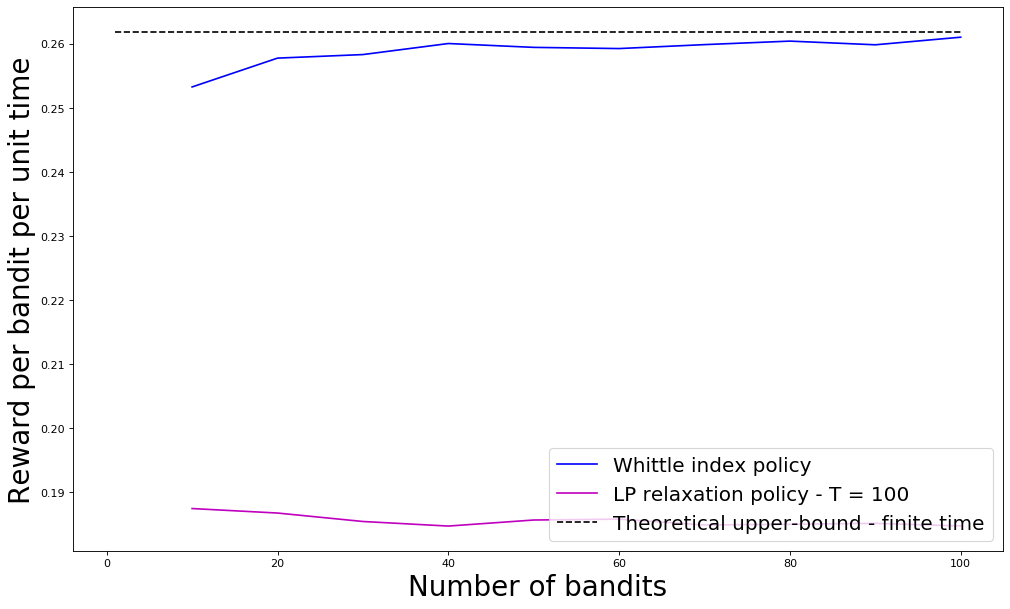

In [12]:
%time p.plot_sim_nbbandits(whittle=True)


In [25]:
p2 = Problem(3, 50, alpha, 100, PR=[P0, P1, R0, R1], tau=10, time_exp=5, repeat_times = 10)

CPU times: user 143 ms, sys: 16 ms, total: 159 ms
Wall time: 179 ms


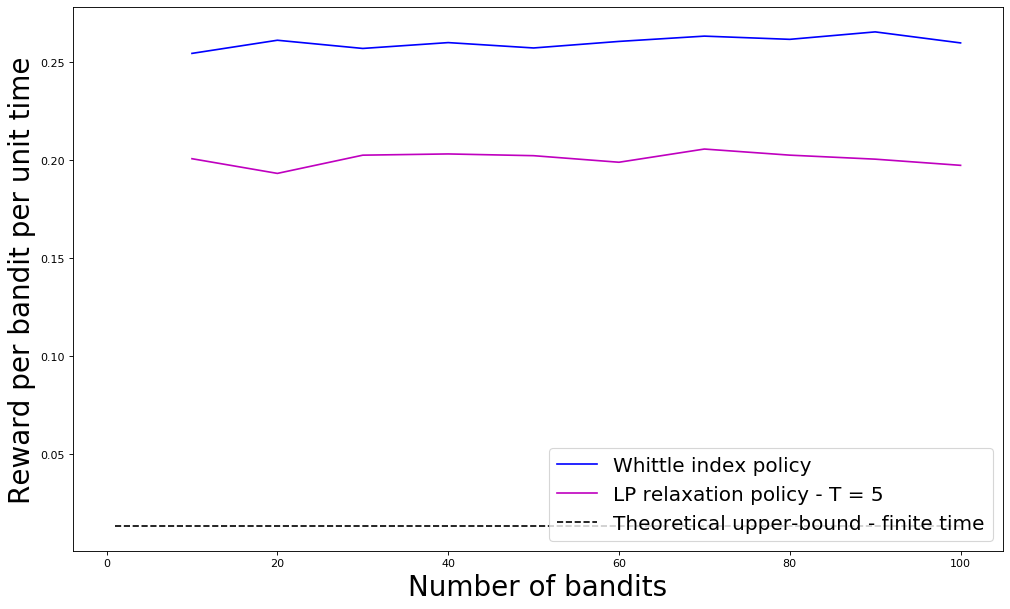

In [26]:
%time p2.plot_sim_nbbandits(whittle=True)
